**Thato Maelane Assignment 3.1 Regression**

# Introduction
The amount of solar radiation on a given day is a useful indicator of how much energy can be produced using solar panels. In this notebook you will explore how to build a model that will predict the amount of radiation from other weather readings.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

**Load the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving reading-climate-solar-19-21.csv to reading-climate-solar-19-21.csv


In [3]:
df = pd.read_csv('reading-climate-solar-19-21.csv')

In [5]:
df.head(10)

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation
0,2019,1,1,1034.9,9.6,6.1,7.8,7,2.1,0.2,1.75
1,2019,1,2,1044.1,5.5,0.9,3.2,8,0.9,0.0,1.65
2,2019,1,3,1043.6,4.2,3.2,3.7,7,0.8,0.0,1.51
3,2019,1,4,1043.7,3.6,-2.5,0.6,5,0.0,5.0,4.27
4,2019,1,5,1039.9,6.3,-1.7,2.3,8,1.9,0.0,0.84
5,2019,1,6,1037.7,9.1,3.2,6.2,8,1.0,0.0,1.62
6,2019,1,7,1034.4,10.8,5.8,8.3,8,2.6,0.0,1.21
7,2019,1,8,1028.8,8.6,5.8,7.2,5,3.2,5.2,3.97
8,2019,1,9,1030.6,5.5,1.7,3.6,2,1.7,4.3,3.86
9,2019,1,10,1030.3,7.2,-0.6,3.3,6,1.3,0.0,1.55


In [6]:
df.columns

Index(['year', 'month', 'day', 'MSL pressure', 'Maximum temperature',
       'Minimum temperature', 'Mean air temperature', 'Cloud cover',
       'Wind speed', 'Sunshine duration', 'Total solar radiation'],
      dtype='object')

The data set contains daily climate and weather data recorded for Reading (UK) for the years 2019-2021. It includes a reading for the solar radiation.

There are 1096 individual daily records.

Features:
* **year**
* **month**: *Month of the year: 1 for January, ... 12 for December*
* **day**: *1-31*
* **MSL pressure**: *Mean sea level air pressure (millibars)*
* **Maximum temperature**: *Daily maximum temperature (°C)*
* **Minimum temperature**: *Daily minimum temperature (°C)*
* **Mean air temperature**: *Daily mean temperature (°C)*
* **Cloud cover**: *Proportion of sky covered by cloud (oktas or eighths of the sky)*
* **Wind speed**: *Average wind speed for the day (m/s)*
* **Sunshine duration**: *Total time for the sun shining for the day (hours)*
* **Total solar radiation**: *Amount of energy absorbed in a square metre (MJ/m²)*


**Dataset info**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1096 non-null   int64  
 1   month                  1096 non-null   int64  
 2   day                    1096 non-null   int64  
 3   MSL pressure           1096 non-null   float64
 4   Maximum temperature    1096 non-null   float64
 5   Minimum temperature    1096 non-null   float64
 6   Mean air temperature   1096 non-null   float64
 7   Cloud cover            1096 non-null   int64  
 8   Wind speed             1096 non-null   float64
 9   Sunshine duration      1096 non-null   float64
 10  Total solar radiation  1096 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 94.3+ KB


**The Total solar radiation feature has been imported as an object data type.**

In [8]:

df['Total solar radiation'].describe()

,Total solar radiation
count,1096
unique,862
top,x
freq,17


The most common value for `Total solar radiation` is `x`. These rows can be displayed using the code below.

In [12]:

df[df['Total solar radiation']=='x']

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation
84,2019,3,26,1035.0,13.7,-0.1,6.8,2,1.8,10.3,x
97,2019,4,8,1011.1,11.5,7.2,9.3,8,0.9,0.0,x
153,2019,6,3,1013.1,20.1,9.0,14.6,5,3.0,9.1,x
196,2019,7,16,1019.7,25.9,9.8,17.9,1,1.0,13.0,x
225,2019,8,14,1014.4,18.9,13.5,16.2,8,3.7,0.0,x
244,2019,9,2,1024.1,21.3,7.4,14.4,1,2.5,7.7,x
253,2019,9,11,1019.3,20.7,12.9,16.8,7,2.4,1.5,x
267,2019,9,25,999.0,20.5,14.3,17.4,8,3.0,3.5,x
281,2019,10,9,1005.1,14.9,9.4,12.2,7,3.8,3.6,x
294,2019,10,22,1024.9,15.2,4.1,9.6,0,0.6,6.5,x


**Run the code in the box below to create a copy of the data set with the rows where the values are x for Total solar radiation removed.**

In [13]:
solar_data_clean = df[df['Total solar radiation']!='x'].copy()
solar_data_clean.head(10)

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation
0,2019,1,1,1034.9,9.6,6.1,7.8,7,2.1,0.2,1.75
1,2019,1,2,1044.1,5.5,0.9,3.2,8,0.9,0.0,1.65
2,2019,1,3,1043.6,4.2,3.2,3.7,7,0.8,0.0,1.51
3,2019,1,4,1043.7,3.6,-2.5,0.6,5,0.0,5.0,4.27
4,2019,1,5,1039.9,6.3,-1.7,2.3,8,1.9,0.0,0.84
5,2019,1,6,1037.7,9.1,3.2,6.2,8,1.0,0.0,1.62
6,2019,1,7,1034.4,10.8,5.8,8.3,8,2.6,0.0,1.21
7,2019,1,8,1028.8,8.6,5.8,7.2,5,3.2,5.2,3.97
8,2019,1,9,1030.6,5.5,1.7,3.6,2,1.7,4.3,3.86
9,2019,1,10,1030.3,7.2,-0.6,3.3,6,1.3,0.0,1.55


**The columns will still be stored as object. The type needs to be converted to float. This can be done by creating a copy of the column with the type changed and a new name.**

In [14]:
solar_data_clean['solar_value'] = solar_data_clean['Total solar radiation'].astype('float')
solar_data_clean.head()

,year,month,day,MSL pressure,Maximum temperature,Minimum temperature,Mean air temperature,Cloud cover,Wind speed,Sunshine duration,Total solar radiation,solar_value
0,2019,1,1,1034.9,9.6,6.1,7.8,7,2.1,0.2,1.75,1.75
1,2019,1,2,1044.1,5.5,0.9,3.2,8,0.9,0.0,1.65,1.65
2,2019,1,3,1043.6,4.2,3.2,3.7,7,0.8,0.0,1.51,1.51
3,2019,1,4,1043.7,3.6,-2.5,0.6,5,0.0,5.0,4.27,4.27
4,2019,1,5,1039.9,6.3,-1.7,2.3,8,1.9,0.0,0.84,0.84


**The data types and the new column should be checked to confirm they have been created correctly.**

In [15]:
solar_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 0 to 1095
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1079 non-null   int64  
 1   month                  1079 non-null   int64  
 2   day                    1079 non-null   int64  
 3   MSL pressure           1079 non-null   float64
 4   Maximum temperature    1079 non-null   float64
 5   Minimum temperature    1079 non-null   float64
 6   Mean air temperature   1079 non-null   float64
 7   Cloud cover            1079 non-null   int64  
 8   Wind speed             1079 non-null   float64
 9   Sunshine duration      1079 non-null   float64
 10  Total solar radiation  1079 non-null   object 
 11  solar_value            1079 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 109.6+ KB


In [16]:
solar_data_clean['solar_value'].describe()

,solar_value
count,1079.000000
mean,10.582854
std,7.838079
min,0.450000
25%,3.590000
50%,8.910000
75%,16.655000
max,29.950000



# Exploratory data analysis

## Using pairplot
Before building a model it can be helpful to explore all the possible scatter diagrams with Total solar radiation on the y-axis.

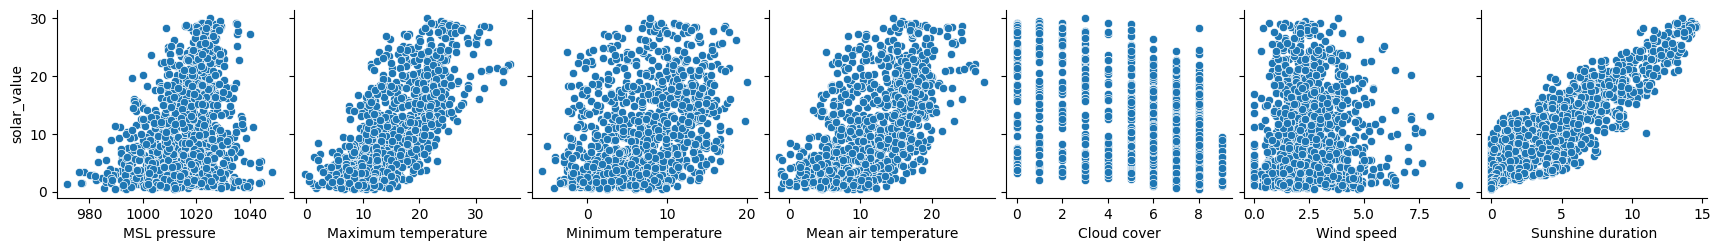

In [17]:

sns.pairplot(solar_data_clean, x_vars=['MSL pressure', 'Maximum temperature' , 'Minimum temperature', 'Mean air temperature', 'Cloud cover', 'Wind speed', 'Sunshine duration'], y_vars=['solar_value'], diag_kind=None);

`Maximum temperature`, `Mean air temperature` and `Sunshine duration` show some association. Individual scatter plots are shown for these below.

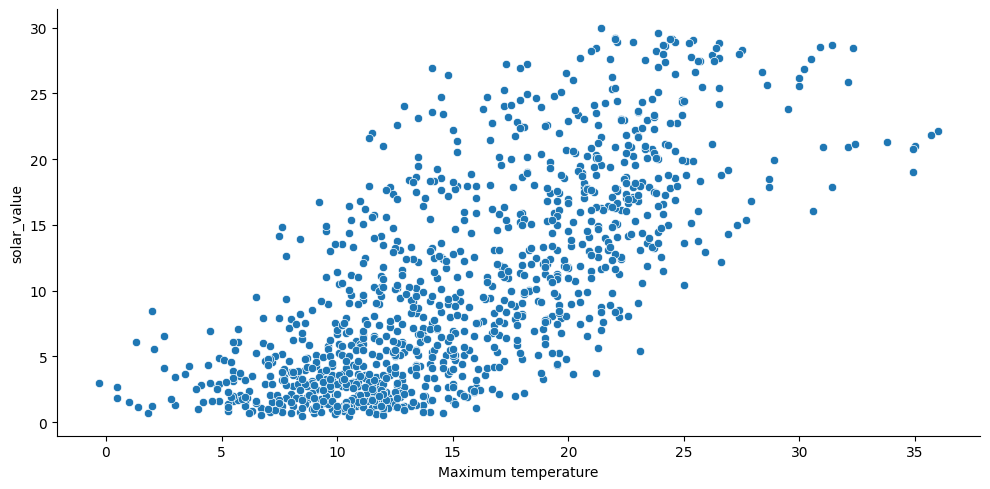

In [18]:
sns.relplot(data=solar_data_clean, x="Maximum temperature", y="solar_value", aspect=2);

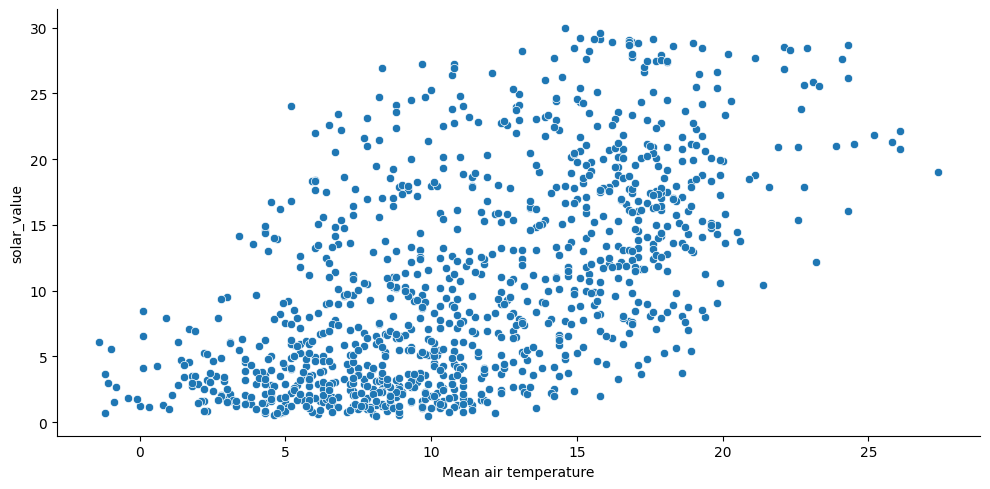

In [19]:
sns.relplot(data=solar_data_clean, x="Mean air temperature", y="solar_value", aspect=2);

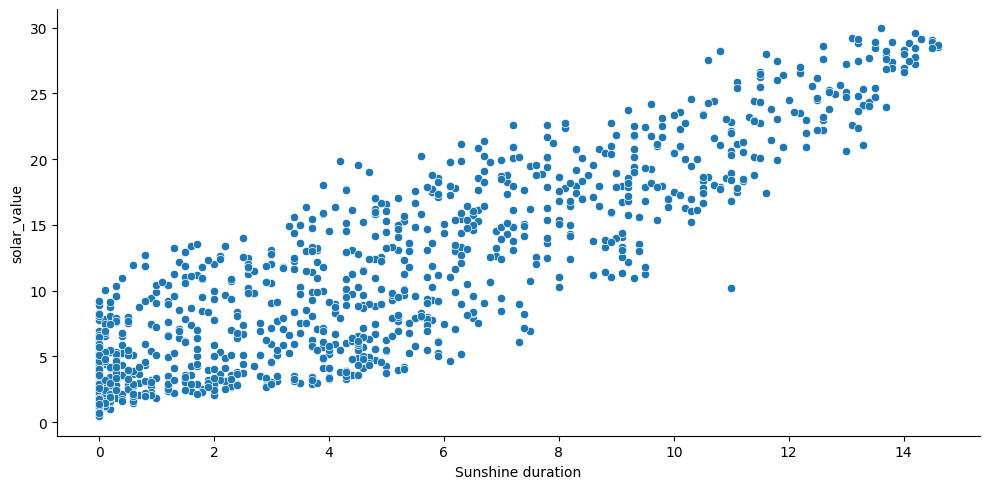

In [20]:
sns.relplot(data=solar_data_clean, x="Sunshine duration", y="solar_value", aspect=2);

**Model 1 Linear Regression**


In [27]:
# features (X) and the target (y)
input_features = ['Maximum temperature']
X = solar_data_clean[input_features]
y = solar_data_clean['solar_value']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#Linear Regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train, y_train)

# model parameters
print('Coefficients:\n', round(linear_model.coef_[0], 3))
print('Intercept:\n', round(linear_model.intercept_, 3))

# predictions on the test data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = linear_model.predict(X_test)

# regression metrics
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# results
print('RMSE:', round(np.sqrt(rmse), 3))
print('R²:', round((100 * r2), 3), "%")

Coefficients:
 0.905
Intercept:
 -3.439
RMSE: 5.626
R²: 50.372 %


**Model 2 Random Forest**

In [29]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=1)
rf_model.fit(X_train, y_train)

# predictions
y_pred_rf = rf_model.predict(X_test)

# metrics
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# results
print('\nRandom Forest Results:')
print('RMSE:', round(np.sqrt(rmse_rf), 3))
print('R²:', round((100 * r2_rf), 3), "%")


Random Forest Results:
RMSE: 5.937
R²: 44.737 %


**Model Comparison**

In [30]:
print('\nModel Comparison:')
print('Linear Regression -> RMSE:', round(np.sqrt(rmse), 3), ', R²:', round((100 * r2), 3), '%')
print('Random Forest     -> RMSE:', round(np.sqrt(rmse_rf), 3), ', R²:', round((100 * r2_rf), 3), '%')

if np.sqrt(rmse_rf) < np.sqrt(rmse):
    print('\n✅ Random Forest performed better (lower RMSE).')
else:
    print('\n✅ Linear Regression performed better (lower RMSE).')


Model Comparison:
Linear Regression -> RMSE: 5.626 , R²: 50.372 %
Random Forest     -> RMSE: 5.937 , R²: 44.737 %

✅ Linear Regression performed better (lower RMSE).


**Residual Histograms**

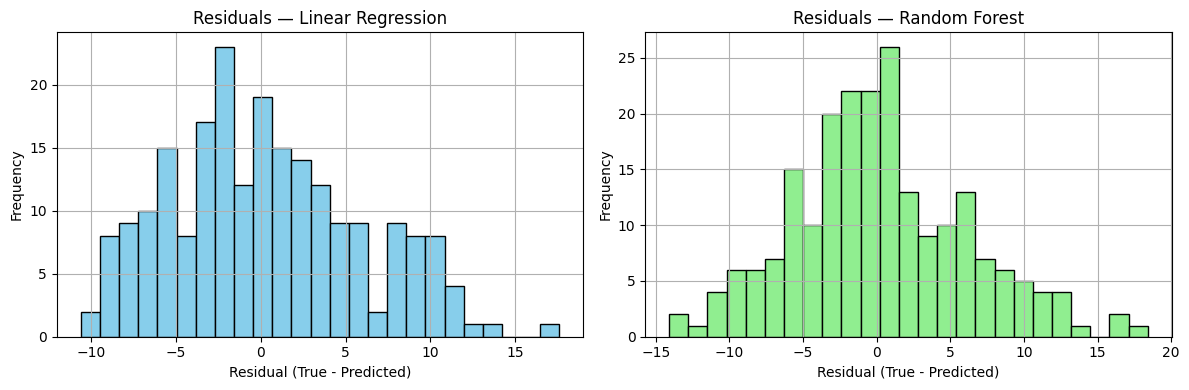

In [31]:
residuals_lr = y_test - y_pred
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(residuals_lr, bins=25, color='skyblue', edgecolor='black')
plt.title('Residuals — Linear Regression')
plt.xlabel('Residual (True - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(residuals_rf, bins=25, color='lightgreen', edgecolor='black')
plt.title('Residuals — Random Forest')
plt.xlabel('Residual (True - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()